# 1. Import Data

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
file_path = 'folder_path/cafe_sales_data.csv'

df = pd.read_csv(file_path)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [285]:
print('------General information of data frame------')
df.info()

print('\n------Describe each columns statitcs value------')
df.describe()

------General information of data frame------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB

------Describe each columns statitcs value------


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


# 2. Check raw data and make a strategy

In [286]:
print(f"Number of rows: {df.shape[0]}")

print('\n------Number of unique values for each column------\n')
df.nunique()

Number of rows: 10000

------Number of unique values for each column------



,0
Transaction ID,10000
Item,10
Quantity,7
Price Per Unit,8
Total Spent,19
Payment Method,5
Location,4
Transaction Date,367


In [287]:
for col in df.columns:
  unique_values = df[col].unique()
  print(f"Unique values for column '{col}': {unique_values}\n")

Unique values for column 'Transaction ID': ['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']

Unique values for column 'Item': ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']

Unique values for column 'Quantity': ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]

Unique values for column 'Price Per Unit': ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']

Unique values for column 'Total Spent': ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']

Unique values for column 'Payment Method': ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

Unique values for column 'Location': ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']

Unique values for column 'Transaction Date': ['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-

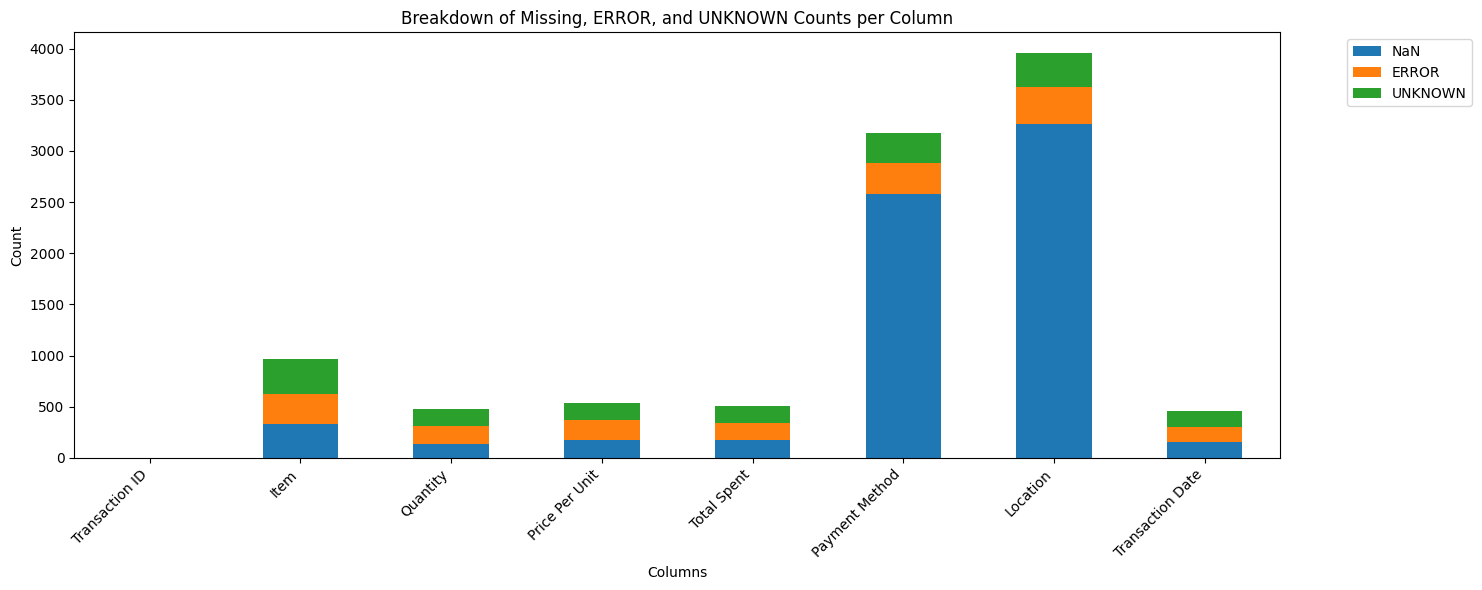

In [288]:
# Create a DataFrame to store the counts of NaN, ERROR, and UNKNOWN for each column
missing_error_unknown_counts = pd.DataFrame({
    'NaN': df.isnull().sum(),
    'ERROR': (df == 'ERROR').sum(),
    'UNKNOWN': (df == 'UNKNOWN').sum()
})

# Plot a stacked bar chart
ax = missing_error_unknown_counts.plot(kind='bar', stacked=True, figsize=(13, 6))

plt.title('Breakdown of Missing, ERROR, and UNKNOWN Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [289]:
missing_error_unknown_counts['Sum'] = missing_error_unknown_counts.sum(axis=1)
missing_error_unknown_counts

,NaN,ERROR,UNKNOWN,Sum
Transaction ID,0,0,0,0
Item,333,292,344,969
Quantity,138,170,171,479
Price Per Unit,179,190,164,533
Total Spent,173,164,165,502
Payment Method,2579,306,293,3178
Location,3265,358,338,3961
Transaction Date,159,142,159,460


## Data Check - Transaction ID

In [290]:
import re

# Define the pattern
pattern = r'^TXN_\d{7}$'

# Check if all transaction IDs match the pattern
matches = df['Transaction ID'].apply(lambda x: bool(re.fullmatch(pattern, x)))

# Count the number of IDs that don't match
non_matching_count = (~matches).sum()

if non_matching_count == 0:
    print("All Transaction IDs are in the format 'TXN_xxxxxxx' with exactly 7 digits.")
else:
    print(f"There are {non_matching_count} Transaction IDs that do not match the format 'TXN_xxxxxxx' with exactly 7 digits.")

All Transaction IDs are in the format 'TXN_xxxxxxx' with exactly 7 digits.


In [291]:
df_check_transaction_id = df.copy()
df_check_transaction_id['Transaction ID'] = df_check_transaction_id['Transaction ID'].sort_values()
df_check_transaction_id

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [292]:
df_sorted_transaction_id = df.sort_values(by='Transaction ID')
display(df_sorted_transaction_id[['Transaction ID', 'Transaction Date']].head(10))

,Transaction ID,Transaction Date
2987,TXN_1000555,2023-10-19
115,TXN_1001832,UNKNOWN
418,TXN_1002457,2023-09-29
3417,TXN_1003246,2023-02-15
4366,TXN_1004184,2023-05-18
3995,TXN_1004563,2023-10-28
1886,TXN_1005331,2023-11-04
8071,TXN_1005377,2023-06-03
9311,TXN_1005472,2023-04-21
4744,TXN_1006942,2023-11-30


In [295]:
# Extract the numerical part from 'Transaction ID'
df_id_date = df.copy() # Create a copy to avoid modifying the original DataFrame directly
df_id_date['Transaction ID Numeric'] = df_id_date['Transaction ID'].str.replace('TXN_', '').astype(int)

# Display the first few rows with the new numeric column
display(df_id_date[['Transaction ID', 'Transaction ID Numeric', 'Transaction Date']].head())

,Transaction ID,Transaction ID Numeric,Transaction Date
0,TXN_1961373,1961373,2023-09-08
1,TXN_4977031,4977031,2023-05-16
2,TXN_4271903,4271903,2023-07-19
3,TXN_7034554,7034554,2023-04-27
4,TXN_3160411,3160411,2023-06-11


### Insights

There is no relation ship between Transaction ID and Transaction Date

## Data Check - Item

In [293]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [294]:
# Focus on some error value
df[df['Item'] == 'UNKNOWN']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
31,TXN_8927252,UNKNOWN,2,1.0,ERROR,Credit Card,ERROR,2023-11-06
33,TXN_7710508,UNKNOWN,5,1.0,5.0,Cash,NaN,ERROR
36,TXN_6855453,UNKNOWN,4,3.0,12.0,NaN,In-store,2023-07-17
52,TXN_8914892,UNKNOWN,5,5.0,25.0,Digital Wallet,NaN,2023-03-15
...,...,...,...,...,...,...,...,...
9764,TXN_1688292,UNKNOWN,3,NaN,9.0,Credit Card,In-store,NaN
9777,TXN_4385826,UNKNOWN,2,1.5,3.0,Credit Card,Takeaway,2023-08-02
9836,TXN_9162296,UNKNOWN,3,4.0,12.0,Cash,In-store,2023-05-10
9946,TXN_8807600,UNKNOWN,1,4.0,4.0,Cash,Takeaway,2023-09-24


In [296]:
df[df['Item'] == 'ERROR']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
14,TXN_8915701,ERROR,2,1.5,3.0,NaN,In-store,2023-03-21
69,TXN_8471743,ERROR,5,3.0,15.0,Digital Wallet,In-store,2023-04-06
88,TXN_9487821,ERROR,1,5.0,5.0,Digital Wallet,Takeaway,2023-05-24
118,TXN_4633784,ERROR,5,NaN,15.0,NaN,In-store,2023-02-06
211,TXN_6717827,ERROR,3,5.0,15.0,Digital Wallet,NaN,2023-11-15
...,...,...,...,...,...,...,...,...
9910,TXN_2338617,ERROR,2,3.0,6.0,Digital Wallet,UNKNOWN,2023-01-12
9918,TXN_2292088,ERROR,1,4.0,4.0,Digital Wallet,Takeaway,2023-03-04
9951,TXN_4122925,ERROR,4,1.0,4.0,NaN,Takeaway,2023-10-20
9958,TXN_4125474,ERROR,2,5.0,10.0,Credit Card,In-store,2023-08-02


In [297]:
df[df['Item'].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
30,TXN_1736287,NaN,5,2.0,10.0,Digital Wallet,NaN,2023-06-02
61,TXN_8051289,NaN,1,3.0,3.0,NaN,In-store,2023-10-09
72,TXN_6044979,NaN,1,1.0,1.0,Cash,In-store,2023-12-08
89,TXN_4132730,NaN,5,1.0,5.0,NaN,In-store,2023-03-12
...,...,...,...,...,...,...,...,...
9820,TXN_8751702,NaN,5,NaN,15.0,Cash,NaN,2023-02-13
9855,TXN_3740505,NaN,2,1.5,3.0,NaN,NaN,2023-11-21
9876,TXN_3105633,NaN,1,2.0,2.0,NaN,In-store,2023-03-30
9885,TXN_4659954,NaN,3,4.0,12.0,Credit Card,In-store,NaN


In [298]:
# Convert 'Price Per Unit' to numeric, coercing errors to NaN
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')

# Group by 'Item' and describe the 'Price Per Unit'
item_price_description = df.groupby('Item')['Price Per Unit'].describe()

print("Description of 'Price Per Unit' for each 'Item':")
display(item_price_description)

Description of 'Price Per Unit' for each 'Item':


,count,mean,std,min,25%,50%,75%,max
Item,,,,,,,,
Cake,1085.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
Coffee,1108.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Cookie,1026.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
ERROR,279.0,2.944444,1.295244,1.0,1.5,3.0,4.0,5.0
Juice,1110.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
Salad,1082.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
Sandwich,1082.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
Smoothie,1036.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
Tea,1023.0,1.500000,0.000000,1.5,1.5,1.5,1.5,1.5


/tmp/ipython-input-3295802824.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item', y='Price Per Unit', data=df_cleaned, palette='viridis')


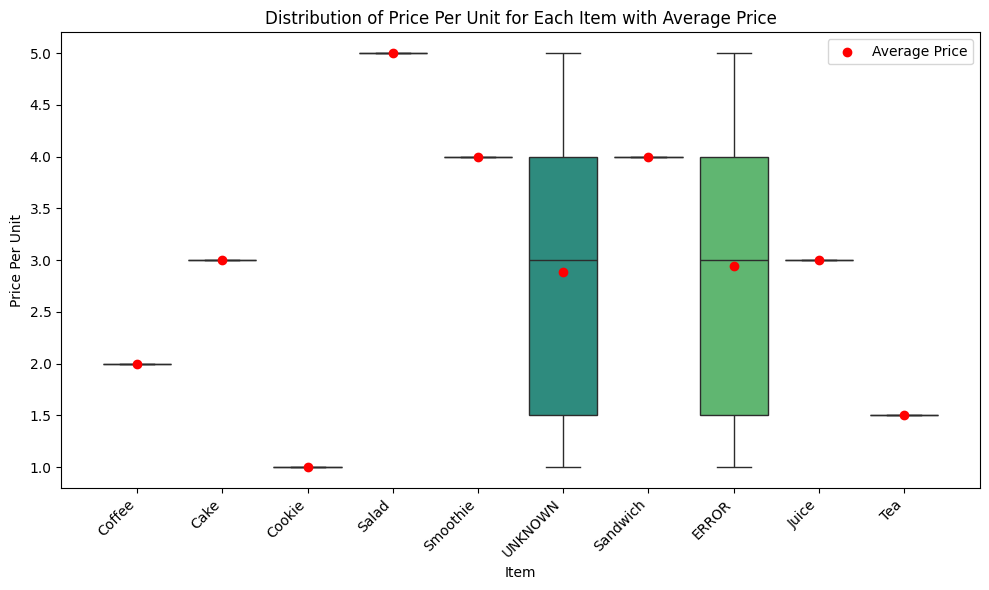

In [299]:
# overlay the average price

# Remove rows where 'Item' or 'Price Per Unit' are NaN or 'ERROR'/'UNKNOWN' for plotting
df_cleaned = df.dropna(subset=['Item', 'Price Per Unit']).copy()
# df_cleaned = df_cleaned[~df_cleaned['Item'].isin(['ERROR', 'UNKNOWN'])]

# Calculate the average price per item (excluding ERROR and UNKNOWN)
average_price_per_item = df_cleaned.groupby('Item')['Price Per Unit'].mean()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Price Per Unit', data=df_cleaned, palette='viridis')

# Overlay the average price as points
plt.scatter(x=average_price_per_item.index, y=average_price_per_item.values, color='red', zorder=5, label='Average Price')

plt.title('Distribution of Price Per Unit for Each Item with Average Price')
plt.xlabel('Item')
plt.ylabel('Price Per Unit')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Insights

Each item has fixed price. It is not changed during this data range.

So, we can detarmine some item name from price per unit even though item has missing value or error value. We can determine coffee, cookie, salad and tea because these item prices are not duplicated.

## Data check - Quantity

In [300]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [301]:
print("Value counts for the raw 'Quantity' column:")
display(df['Quantity'].value_counts(dropna=False))

Value counts for the raw 'Quantity' column:


,count
Quantity,
5,2013
2,1974
4,1863
3,1849
1,1822
UNKNOWN,171
ERROR,170
NaN,138


/tmp/ipython-input-2420543902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_counts.index, y=quantity_counts.values, palette='viridis')


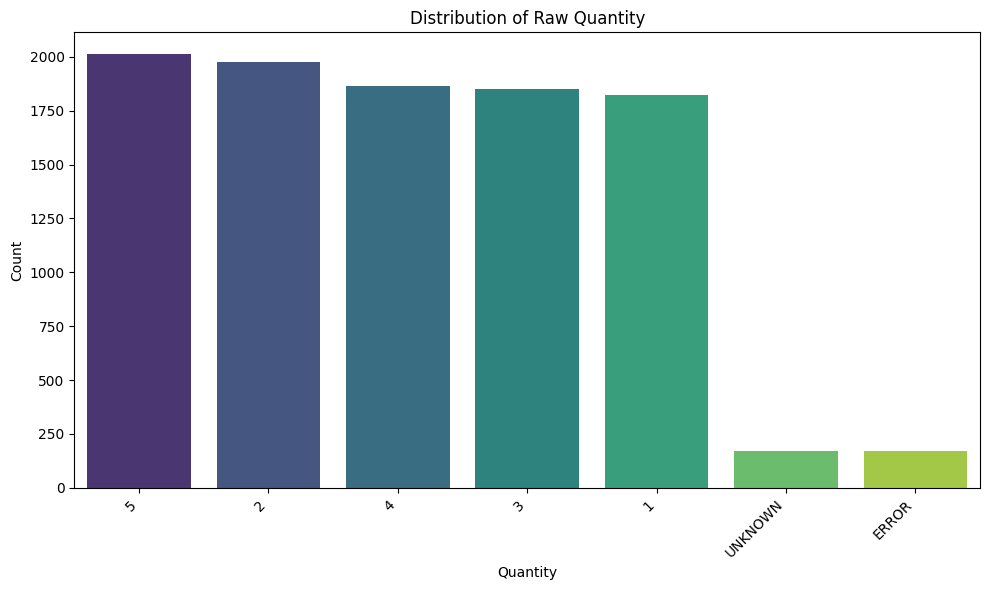

In [302]:
# Get the value counts of the raw 'Quantity' column
quantity_counts = df['Quantity'].value_counts(dropna=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=quantity_counts.index, y=quantity_counts.values, palette='viridis')
plt.title('Distribution of Raw Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data check - Price Per Unit

In [303]:
df['Price Per Unit'].unique()

array([2. , 3. , 1. , 5. , 4. , 1.5, nan])

/tmp/ipython-input-1931909593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_per_unit_counts.index, y=price_per_unit_counts.values, palette='viridis')


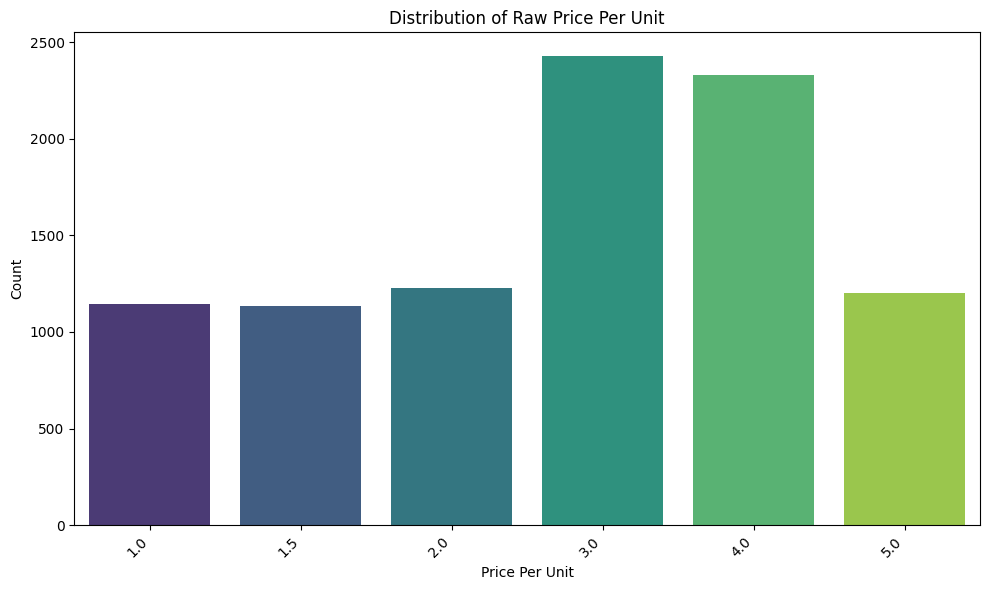

In [304]:
price_per_unit_counts = df['Price Per Unit'].value_counts(dropna=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=price_per_unit_counts.index, y=price_per_unit_counts.values, palette='viridis')
plt.title('Distribution of Raw Price Per Unit')
plt.xlabel('Price Per Unit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data check - Total Spent

In [305]:
df['Total Spent'].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

## Data check - Payment Method

In [306]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

## Data check - Location

In [307]:
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

## Data check - Transaction Date

In [308]:
# Convert 'Transaction Date' to datetime, coercing errors to NaT
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Check for the number of NaT values (which were originally errors or unknown formats)
nat_count = df['Transaction Date'].isna().sum()

if nat_count == 0:
    print("All Transaction Dates are in a valid date format.")
else:
    print(f"There are {nat_count} entries in 'Transaction Date' that were not in a valid date format (including 'ERROR', 'UNKNOWN', and original NaN values).")

# Display the first few rows with the converted date column
display(df.head())

There are 460 entries in 'Transaction Date' that were not in a valid date format (including 'ERROR', 'UNKNOWN', and original NaN values).


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


# Clean data

### Replace some error value to NaN

In [309]:
df_unify_error = df.copy()

for col in df_unify_error.columns:
    df_unify_error[col] = df_unify_error[col].replace(['ERROR', 'UNKNOWN'], np.nan)

print("DataFrame after replacing 'ERROR' and 'UNKNOWN' with NaN in all columns:")
display(df_unify_error.head())

print("\nValue counts for all columns after replacement:")
for col in df_unify_error.columns:
    print(f"Value counts for '{col}':")
    display(df_unify_error[col].value_counts(dropna=False))
    print("-" * 30)

df = df_unify_error

DataFrame after replacing 'ERROR' and 'UNKNOWN' with NaN in all columns:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11



Value counts for all columns after replacement:
Value counts for 'Transaction ID':


,count
Transaction ID,
TXN_9226047,1
TXN_8567525,1
TXN_4583012,1
TXN_6796890,1
TXN_9933628,1
...,...
TXN_3160411,1
TXN_7034554,1
TXN_4271903,1


------------------------------
Value counts for 'Item':


,count
Item,
Juice,1171
Coffee,1165
Salad,1148
Cake,1139
Sandwich,1131
Smoothie,1096
Cookie,1092
Tea,1089
NaN,969


------------------------------
Value counts for 'Quantity':


,count
Quantity,
5,2013
2,1974
4,1863
3,1849
1,1822
NaN,479


------------------------------
Value counts for 'Price Per Unit':


,count
Price Per Unit,
3.0,2429
4.0,2331
2.0,1227
5.0,1204
1.0,1143
1.5,1133
NaN,533


------------------------------
Value counts for 'Total Spent':


,count
Total Spent,
6.0,979
12.0,939
3.0,930
4.0,923
20.0,746
15.0,734
8.0,677
10.0,524
NaN,502


------------------------------
Value counts for 'Payment Method':


,count
Payment Method,
NaN,3178
Digital Wallet,2291
Credit Card,2273
Cash,2258


------------------------------
Value counts for 'Location':


,count
Location,
NaN,3961
Takeaway,3022
In-store,3017


------------------------------
Value counts for 'Transaction Date':


,count
Transaction Date,
NaT,460
2023-06-16,40
2023-02-06,40
2023-09-21,39
2023-07-21,39
...,...
2023-11-24,15
2023-04-27,15
2023-07-22,14


------------------------------


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   object        
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   object        
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 625.1+ KB


In [311]:
df['Total Spent']=df['Total Spent'].astype(float)
df['Quantity']=df['Quantity'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


### Drop Nan Transaction Date

We cannot say unknown transaction date is in 2023 because there is no relationship between Transaction ID and Transaction Date. So, I have decided to drop unknown Transaction Date first.

In [249]:
df = df.dropna(subset=['Transaction Date'])
df_before_replace = df.copy()
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,9540,8613,9086.000000,9034.000000,9064.000000,6525,5761,9540
unique,9540,8,NaN,NaN,NaN,3,2,NaN
top,TXN_6170729,Juice,NaN,NaN,NaN,Digital Wallet,Takeaway,NaN
freq,1,1124,NaN,NaN,NaN,2197,2889,NaN
mean,NaN,NaN,3.025314,2.950022,8.914442,NaN,NaN,2023-07-01 23:00:31.698113536
min,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,2023-01-01 00:00:00
25%,NaN,NaN,2.000000,2.000000,4.000000,NaN,NaN,2023-04-01 00:00:00
50%,NaN,NaN,3.000000,3.000000,8.000000,NaN,NaN,2023-07-02 00:00:00
75%,NaN,NaN,4.000000,4.000000,12.000000,NaN,NaN,2023-10-02 00:00:00
max,NaN,NaN,5.000000,5.000000,25.000000,NaN,NaN,2023-12-31 00:00:00


### Replace price from item


In [312]:
# Create a dictionary mapping items with fixed prices to their price per unit
item_price_mapping = {
    'Coffee': 2.0,
    'Cake': 3.0,
    'Cookie': 1.0,
    'Salad': 5.0,
    'Sandwich': 4.0,
    'Smoothie': 4.0,
    'Tea': 1.5,
    'Juice': 3.0
}

# # Create new dictionaly by revercse mapping
# price_item = { price: item for item, price in item_price_mapping.items()}

df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Item'].map(item_price_mapping))

print('------origin-----')
df_before_replace.info()

print('\n------after-----')
df.info()


------origin-----
<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              8613 non-null   object        
 2   Quantity          9086 non-null   float64       
 3   Price Per Unit    9034 non-null   float64       
 4   Total Spent       9064 non-null   float64       
 5   Payment Method    6525 non-null   object        
 6   Location          5761 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 670.8+ KB

------after-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-nu

### Replace item from price

In [313]:
# Create a dictionary mapping items with fixed prices to their price per unit
item_unique_price_mapping = {
    'Coffee': 2.0,
    'Cookie': 1.0,
    'Salad': 5.0,
    'Tea': 1.5
}

# Create new dictionaly by revercse mapping
price_item = { price: item for item, price in item_unique_price_mapping.items()}

df['Item'] = df['Item'].fillna(df['Price Per Unit'].map(price_item))

print('------origin-----')
df_before_replace.info()

print('\n------after-----')
df.info()

------origin-----
<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              8613 non-null   object        
 2   Quantity          9086 non-null   float64       
 3   Price Per Unit    9034 non-null   float64       
 4   Total Spent       9064 non-null   float64       
 5   Payment Method    6525 non-null   object        
 6   Location          5761 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 670.8+ KB

------after-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-nu

### Replace quantity, total spent, price by calculation

In [314]:
def replace_calculated_total_spent(dataframe):
  dataframe['Total Spent'] = dataframe['Total Spent'].fillna(dataframe['Quantity'] * dataframe['Price Per Unit'])
  return dataframe

In [315]:
def replace_calculated_price_per_unit(dataframe):
  dataframe['Price Per Unit'] = dataframe['Price Per Unit'].fillna(dataframe['Total Spent'] / dataframe['Quantity'])
  return dataframe

In [316]:
def replace_calculated_quantity(dataframe):
  dataframe['Quantity'] = dataframe['Quantity'].fillna(dataframe['Total Spent'] / dataframe['Price Per Unit'])
  return dataframe

In [255]:
# Make sure to have the replacement functions defined (from cells 05CUPAACXPCr, HDpM6qVBXiE3, TZTskZbnXoh6)

df_cleaned_iterative = df.copy() # Start with the current state of df

changes_made = True
iteration = 0

while changes_made:
    changes_made = False
    iteration += 1
    print(f"Iteration {iteration}...")

    df_before_iteration = df_cleaned_iterative.copy()

    # Apply the replacement functions in a specific order (e.g., Total Spent, Price, Quantity)
    # Applying Total Spent first might help fill in values needed for Price and Quantity
    df_cleaned_iterative = replace_calculated_total_spent(df_cleaned_iterative)
    df_cleaned_iterative = replace_calculated_price_per_unit(df_cleaned_iterative)
    df_cleaned_iterative = replace_calculated_quantity(df_cleaned_iterative)


    # Check if any changes were made during this iteration
    # We can compare the DataFrame before and after applying the functions
    if not df_cleaned_iterative.equals(df_before_iteration):
        changes_made = True
        print("Changes were made in this iteration. Continuing...")
    else:
        print("No changes were made in this iteration. Stopping.")


print("\nIterative cleaning complete.")
print("\nDataFrame after iterative cleaning:")
display(df_cleaned_iterative.head())



Iteration 1...
Changes were made in this iteration. Continuing...
Iteration 2...
No changes were made in this iteration. Stopping.

Iterative cleaning complete.

DataFrame after iterative cleaning:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [317]:
df = df_cleaned_iterative # Update the main df to the iteratively cleaned version

In [318]:
print('------origin-----')
df_before_replace.info()

print('\n------after-----')
df.info()

------origin-----
<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              8613 non-null   object        
 2   Quantity          9086 non-null   float64       
 3   Price Per Unit    9034 non-null   float64       
 4   Total Spent       9064 non-null   float64       
 5   Payment Method    6525 non-null   object        
 6   Location          5761 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 670.8+ KB

------after-----
<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   o

### Replace item from price again

In [319]:
price_item = { price: item for item, price in item_unique_price_mapping.items()}

df['Item'] = df['Item'].fillna(df['Price Per Unit'].map(price_item))

print('------origin-----')
df_before_replace.info()

print('\n------after-----')
df.info()

------origin-----
<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              8613 non-null   object        
 2   Quantity          9086 non-null   float64       
 3   Price Per Unit    9034 non-null   float64       
 4   Total Spent       9064 non-null   float64       
 5   Payment Method    6525 non-null   object        
 6   Location          5761 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 670.8+ KB

------after-----
<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   o

In [259]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,9540,9084,9517.00000,9534.000000,9517.000000,6525,5761,9540
unique,9540,8,NaN,NaN,NaN,3,2,NaN
top,TXN_6170729,Coffee,NaN,NaN,NaN,Digital Wallet,Takeaway,NaN
freq,1,1246,NaN,NaN,NaN,2197,2889,NaN
mean,NaN,NaN,3.02133,2.948605,8.923243,NaN,NaN,2023-07-01 23:00:31.698113536
min,NaN,NaN,1.00000,1.000000,1.000000,NaN,NaN,2023-01-01 00:00:00
25%,NaN,NaN,2.00000,2.000000,4.000000,NaN,NaN,2023-04-01 00:00:00
50%,NaN,NaN,3.00000,3.000000,8.000000,NaN,NaN,2023-07-02 00:00:00
75%,NaN,NaN,4.00000,4.000000,12.000000,NaN,NaN,2023-10-02 00:00:00
max,NaN,NaN,5.00000,5.000000,25.000000,NaN,NaN,2023-12-31 00:00:00


In [260]:
quantity_median = df['Quantity'].median()
# Fill null values in the 'quantity' column with the calculated median
df['Quantity'] = df['Quantity'].fillna(quantity_median)

print(f"Null values in 'quantity' column replaced with median ({quantity_median}).")

# Calculate the median of the 'Price Per Unit' column, excluding null values
price_per_unit_median = df['Price Per Unit'].median()

# Fill null values in the 'Price Per Unit' column with the calculated median
df['Price Per Unit'] = df['Price Per Unit'].fillna(price_per_unit_median)

print(f"Null values in 'Price Per Unit' column replaced with median ({price_per_unit_median}).")

# Calculate the median of the 'Total Spent' column, excluding null values
total_spent_median = df['Total Spent'].median()

# Fill null values in the 'Total Spent' column with the calculated median
df['Total Spent'] = df['Total Spent'].fillna(total_spent_median)

print(f"Null values in 'Total Spent' column replaced with median ({total_spent_median}).")

display(df['Quantity'].value_counts(dropna=False))

display(df['Price Per Unit'].value_counts(dropna=False))

display(df['Total Spent'].value_counts(dropna=False))

Null values in 'quantity' column replaced with median (3.0).
Null values in 'Price Per Unit' column replaced with median (3.0).
Null values in 'Total Spent' column replaced with median (8.0).


,count
Quantity,
5.0,2005
2.0,1969
3.0,1881
4.0,1844
1.0,1841


,count
Price Per Unit,
3.0,2446
4.0,2339
2.0,1246
5.0,1216
1.0,1151
1.5,1142


,count
Total Spent,
6.0,970
12.0,950
3.0,927
4.0,921
20.0,751
8.0,711
15.0,710
10.0,522
2.0,497


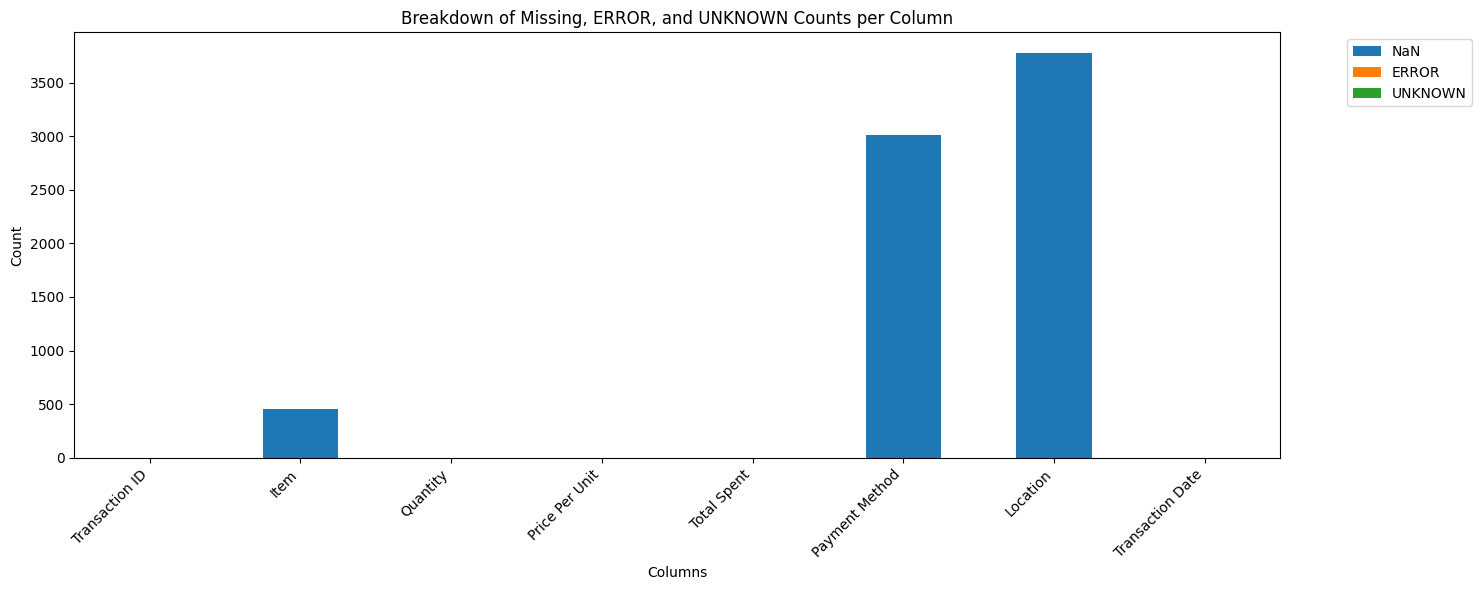

,NaN,ERROR,UNKNOWN,Sum
Transaction ID,0,0,0,0
Item,456,0,0,456
Quantity,0,0,0,0
Price Per Unit,0,0,0,0
Total Spent,0,0,0,0
Payment Method,3015,0,0,3015
Location,3779,0,0,3779
Transaction Date,0,0,0,0


In [261]:
cleaned_missing_error_unknown_counts = pd.DataFrame({
    'NaN': df.isnull().sum(),
    'ERROR': (df == 'ERROR').sum(),
    'UNKNOWN': (df == 'UNKNOWN').sum()
})

# Plot a stacked bar chart
ax = cleaned_missing_error_unknown_counts.plot(kind='bar', stacked=True, figsize=(13, 6))

plt.title('Breakdown of Missing, ERROR, and UNKNOWN Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

cleaned_missing_error_unknown_counts['Sum'] = cleaned_missing_error_unknown_counts.sum(axis=1)
cleaned_missing_error_unknown_counts

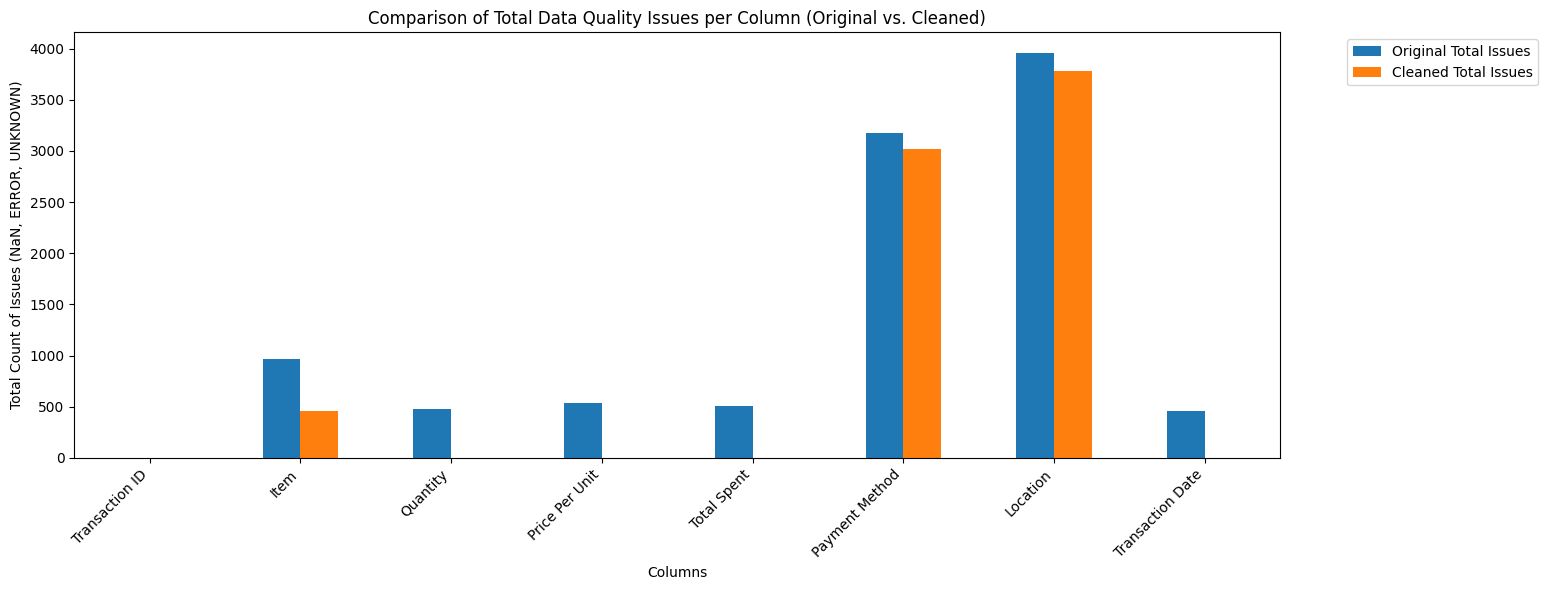

In [262]:
# Extract the 'Sum' of counts from both the original and cleaned dataframes
original_sum_counts = missing_error_unknown_counts['Sum']
cleaned_sum_counts = cleaned_missing_error_unknown_counts['Sum']

# Combine the two Series into a single DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Original Total Issues': original_sum_counts,
    'Cleaned Total Issues': cleaned_sum_counts
})

# Create a grouped bar chart
ax = comparison_df.plot(kind='bar', figsize=(13, 6))

plt.title('Comparison of Total Data Quality Issues per Column (Original vs. Cleaned)')
plt.xlabel('Columns')
plt.ylabel('Total Count of Issues (NaN, ERROR, UNKNOWN)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Analyzed data

## Analyze weekday trend

### Weekday vs Number of Transaction

In [263]:
df['Weekday'] = df['Transaction Date'].dt.day_name()

display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Weekday
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday


/tmp/ipython-input-2698270897.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_transaction_counts = df.groupby('Weekday').size()


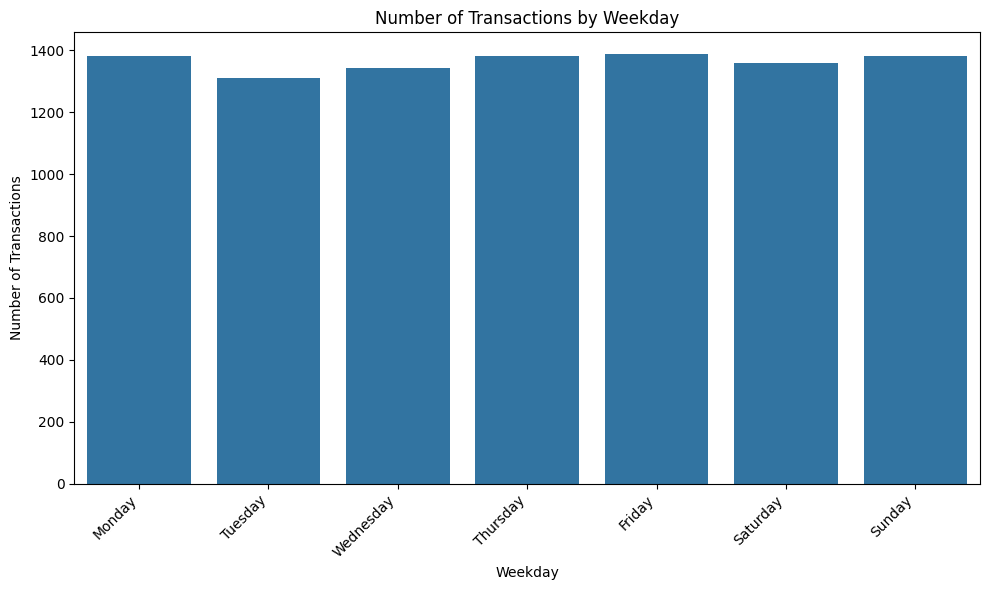

In [264]:
# Define the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Weekday' column to categorical with the specified order
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

# Recalculate weekday transaction counts with the ordered categories
weekday_transaction_counts = df.groupby('Weekday').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_transaction_counts.index, y=weekday_transaction_counts.values)
plt.title('Number of Transactions by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insights

There is no strong relationships.

### Weekday vs Total Spent

In [265]:
weekday_sales = df.groupby('Weekday')['Total Spent'].sum()
display(weekday_sales)

/tmp/ipython-input-3189592760.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sales = df.groupby('Weekday')['Total Spent'].sum()


,Total Spent
Weekday,
Monday,12164.0
Tuesday,12063.5
Wednesday,11696.5
Thursday,12433.5
Friday,12374.0
Saturday,12071.5
Sunday,12303.5


/tmp/ipython-input-3860900438.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_transaction_counts = df.groupby('Weekday').size()
/tmp/ipython-input-3860900438.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sales = df.groupby('Weekday')['Total Spent'].sum()


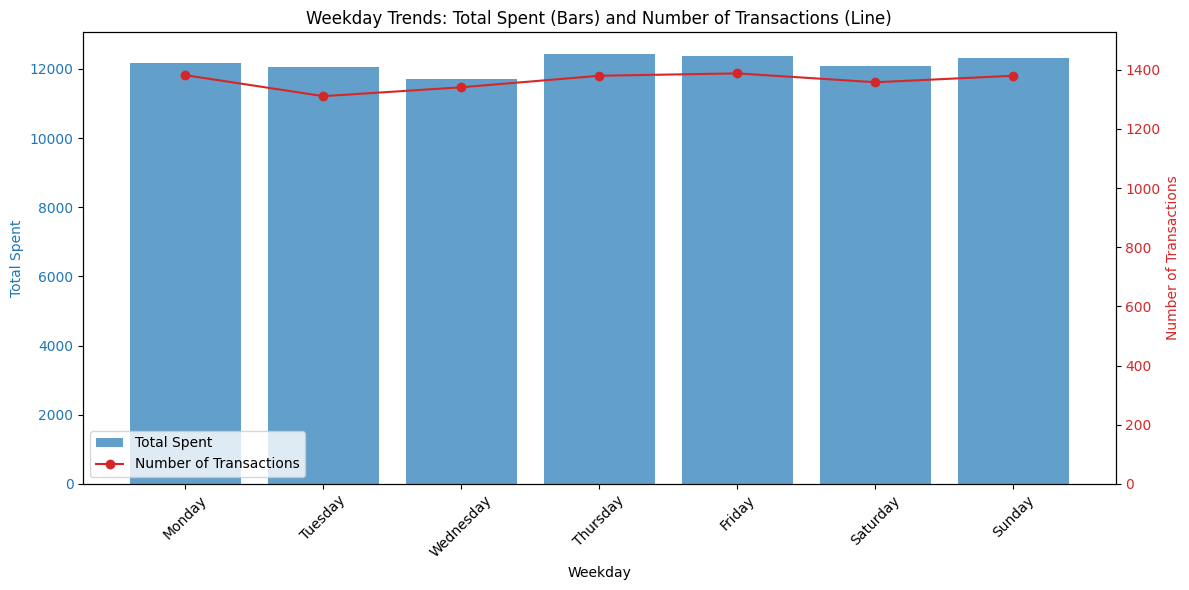

In [266]:
# Ensure Weekday is a categorical type with the correct order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

# Recalculate weekday transaction counts and sales with the ordered categories
weekday_transaction_counts = df.groupby('Weekday').size()
weekday_sales = df.groupby('Weekday')['Total Spent'].sum()

# Create the figure and the first axes (for total sales - bar chart)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the total sales on the first axes as a bar chart
ax1.bar(weekday_sales.index, weekday_sales.values, color='tab:blue', alpha=0.7, label='Total Spent')
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Total Spent', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Weekday Trends: Total Spent (Bars) and Number of Transactions (Line)')
ax1.tick_params(axis='x', rotation=45)


# Create a second axes that shares the same x-axis (for transaction counts - line chart)
ax2 = ax1.twinx()

# Plot the transaction counts on the second axes as a line chart
ax2.plot(weekday_transaction_counts.index, weekday_transaction_counts.values, color='tab:red', marker='o', label='Number of Transactions')
ax2.set_ylabel('Number of Transactions', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, weekday_transaction_counts.values.max() * 1.1) # Set y-axis to start from 0 with a little buffer at the top


# Add legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Adjust layout to prevent labels overlapping
fig.tight_layout()
plt.show()

/tmp/ipython-input-42312584.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sales = df.groupby('Weekday')['Total Spent'].sum()


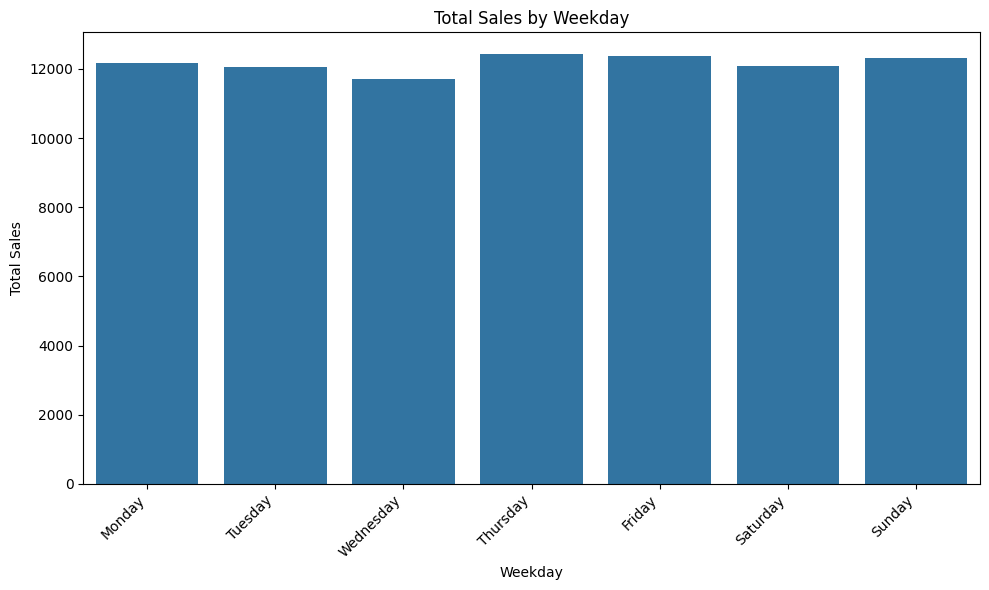

In [267]:
# Define the desired order of weekdays (if not already defined and applied to df)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

# Recalculate weekday sales with the ordered categories
weekday_sales = df.groupby('Weekday')['Total Spent'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insights

There is no strong relationships.

### Weekday vs Location

In [268]:
weekday_location = df.groupby('Weekday')['Location'].sum()
display(weekday_location)

/tmp/ipython-input-390013830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_location = df.groupby('Weekday')['Location'].sum()


,Location
Weekday,
Monday,TakeawayTakeawayIn-storeIn-storeTakeawayIn-sto...
Tuesday,In-storeTakeawayIn-storeIn-storeIn-storeTakeaw...
Wednesday,In-storeIn-storeIn-storeIn-storeIn-storeTakeaw...
Thursday,TakeawayTakeawayIn-storeTakeawayIn-storeIn-sto...
Friday,TakeawayTakeawayTakeawayIn-storeTakeawayTakeaw...
Saturday,In-storeIn-storeIn-storeTakeawayIn-storeIn-sto...
Sunday,In-storeIn-storeTakeawayTakeawayTakeawayTakeaw...


Transaction counts by Weekday and Location:


/tmp/ipython-input-4131140345.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_location_counts = df_cleaned_location.groupby(['Weekday', 'Location']).size().unstack(fill_value=0)


Location,In-store,Takeaway,Unknown
Weekday,,,
Monday,418,412,552
Tuesday,389,395,527
Wednesday,425,397,519
Thursday,427,418,535
Friday,384,446,558
Saturday,409,390,559
Sunday,420,431,529


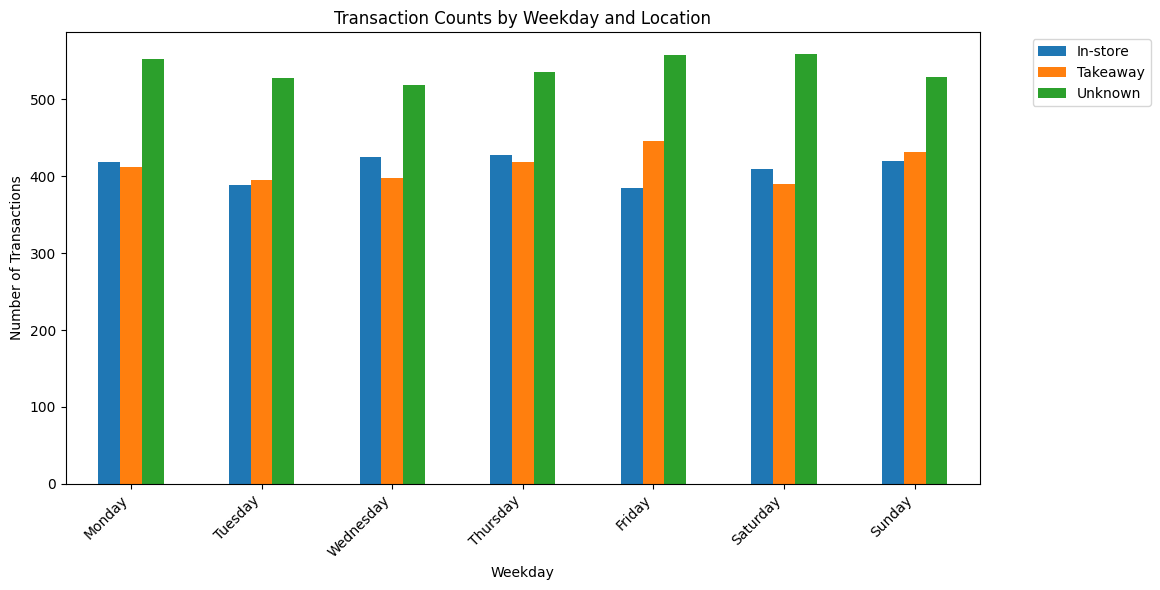

In [269]:
# Clean the 'Location' column by replacing NaN with a category like 'Unknown' or dropping them
# Based on previous cleaning, 'ERROR' and 'UNKNOWN' should already be NaN.
# Let's fill NaN locations with 'Unknown' for analysis
df_cleaned_location = df.copy()
df_cleaned_location['Location'] = df_cleaned_location['Location'].fillna('Unknown') # Fill NaN for grouping

# Group by Weekday and Location and count transactions
weekday_location_counts = df_cleaned_location.groupby(['Weekday', 'Location']).size().unstack(fill_value=0)

print("Transaction counts by Weekday and Location:")
display(weekday_location_counts)

# You can also visualize this with a grouped bar chart
ax = weekday_location_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Transaction Counts by Weekday and Location')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='best')

plt.show()

#### Insights

Only on Friday, takeaway is clealy higher than In-Store. It seems like people hold the home-party on Friday.

## Analyze seasonal trend

In [270]:
df['Month'] = df['Transaction Date'].dt.month
display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Weekday,Month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday,9
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday,5
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Wednesday,7
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,Thursday,4
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday,6


In [271]:
monthly_transaction_counts = df.groupby('Month').size()
display(monthly_transaction_counts)

,0
Month,
1,818
2,727
3,827
4,774
5,777
6,818
7,791
8,803
9,788


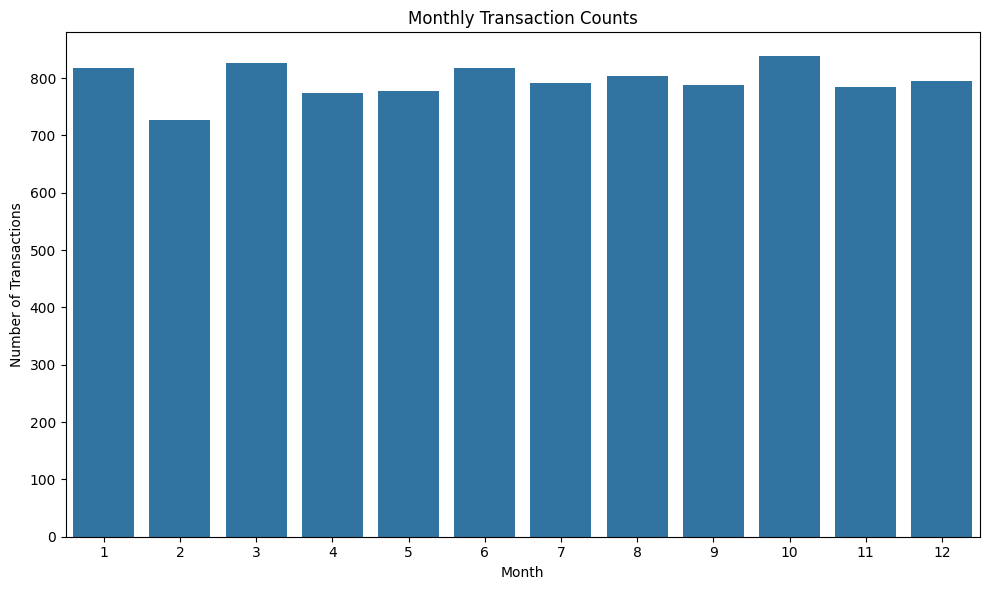

In [272]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_transaction_counts.index, y=monthly_transaction_counts.values)
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0) # Months are numerical, no need to rotate
plt.tight_layout()
plt.show()

In [273]:
monthly_sales = df.groupby('Month')['Total Spent'].sum()
display(monthly_sales)

,Total Spent
Month,
1,7278.0
2,6652.0
3,7224.0
4,7203.0
5,6989.5
6,7361.0
7,6893.5
8,7120.5
9,6887.0


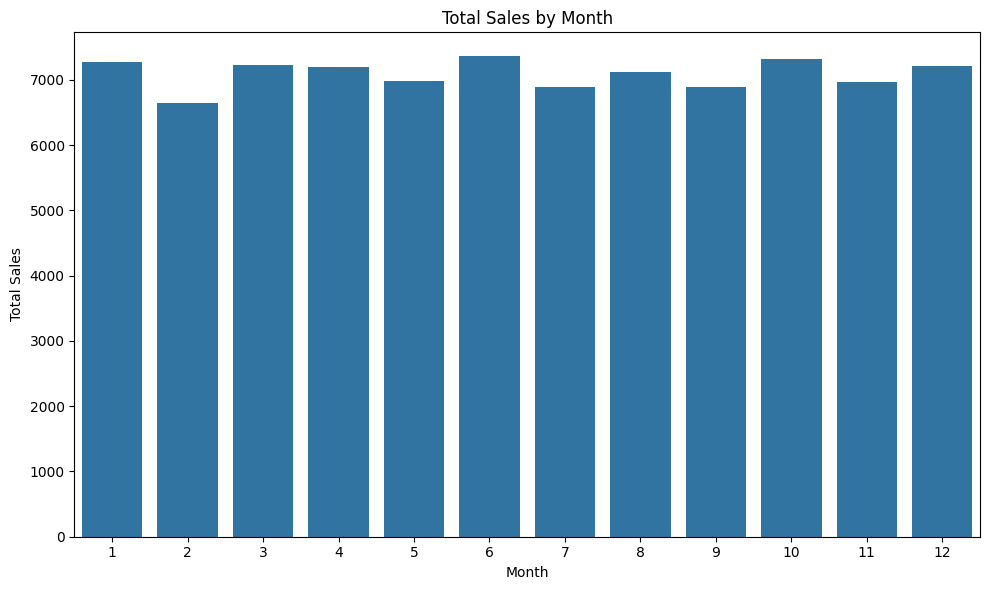

In [274]:
# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Generate a bar plot
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)

# Set plot title and labels
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Ensure x-axis labels are readable (no rotation needed for numerical months)
plt.xticks(rotation=0)

# Prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [275]:
# monthly_item_sales = df.groupby(['Month', 'Item'])['Quantity'].sum()
monthly_item_sales = df.groupby(['Month', 'Item'])['Total Spent'].sum()
display(monthly_item_sales.head())

Month  Item  
1      Cake       855.0
       Coffee     600.0
       Cookie     292.0
       Juice      918.0
       Salad     1665.0
Name: Total Spent, dtype: float64

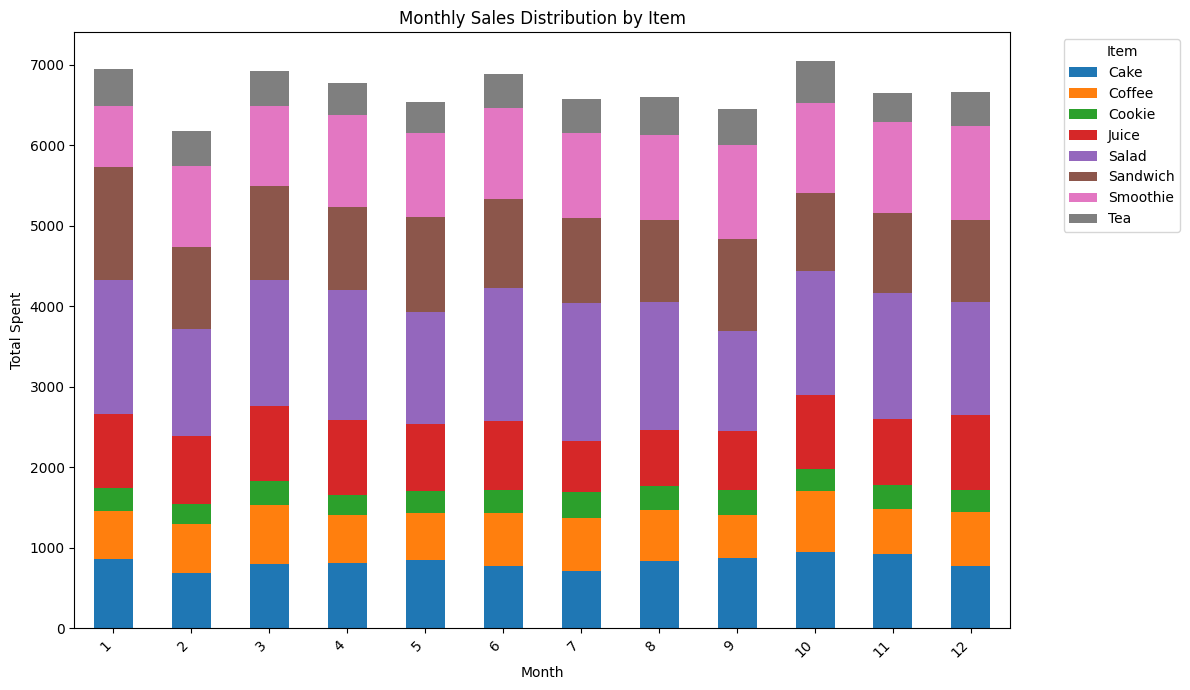

In [276]:
# Unstack the Series to get months as index and items as columns
monthly_item_sales_unstacked = monthly_item_sales.unstack(fill_value=0)

# Create a stacked bar chart
ax = monthly_item_sales_unstacked.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add title and labels
plt.title('Monthly Sales Distribution by Item')
plt.xlabel('Month')
plt.ylabel('Total Spent')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
ax.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

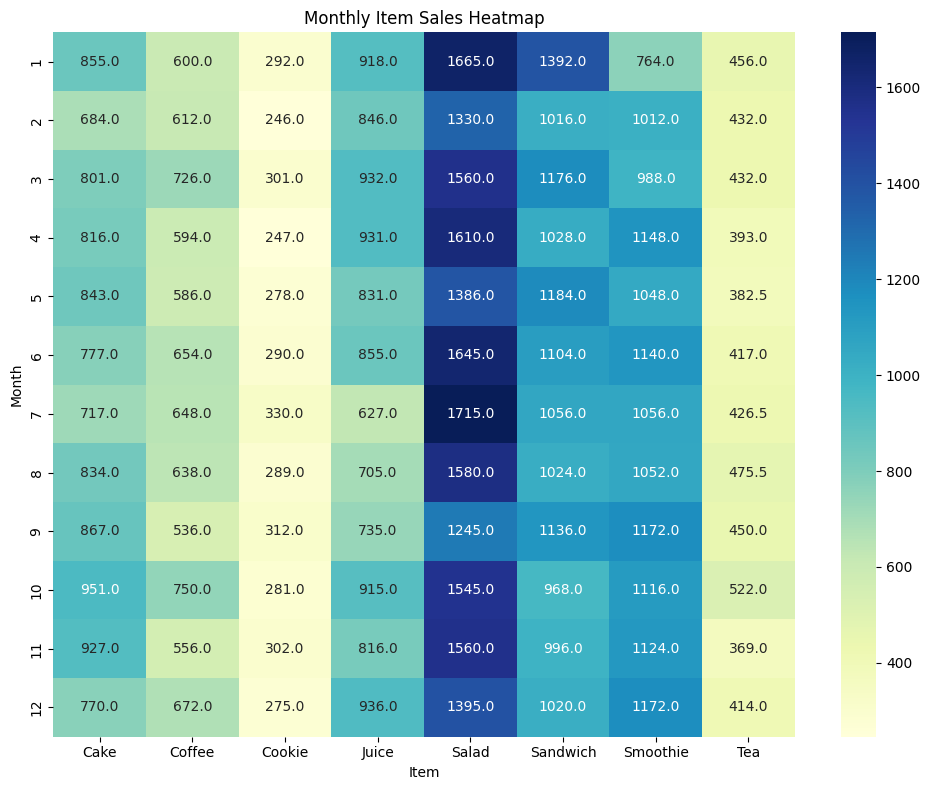

In [277]:
# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_item_sales_unstacked, annot=True, fmt=".1f", cmap="YlGnBu")

# Add title and labels
plt.title('Monthly Item Sales Heatmap')
plt.xlabel('Item')
plt.ylabel('Month')

plt.tight_layout()
plt.show()

### Summary:

#### Data Analysis Key Findings

*   The number of transactions varied by month.
*   Total sales also showed monthly variation, generally mirroring the transaction counts.
*   Analysis of item sales by month revealed the quantity sold for each item in each month, indicating potential seasonal popularity for specific items.
*   Visualizations (stacked bar chart and heat map) provided clear representations of how item sales distributed across the months.

#### Insights or Next Steps

*   Further investigate the specific items that show significant peaks in sales during certain months to understand seasonal demand drivers.
*   Consider analyzing year-over-year trends if multiple years of data are available to confirm seasonal patterns and identify long-term growth or decline.


Transaction counts by Month and Location:


Location,In-store,Takeaway,Unknown
Month,,,
1,261,257,300
2,226,217,284
3,232,258,337
4,227,246,301
5,225,234,318
6,244,244,330
7,241,239,311
8,223,250,330
9,236,244,308


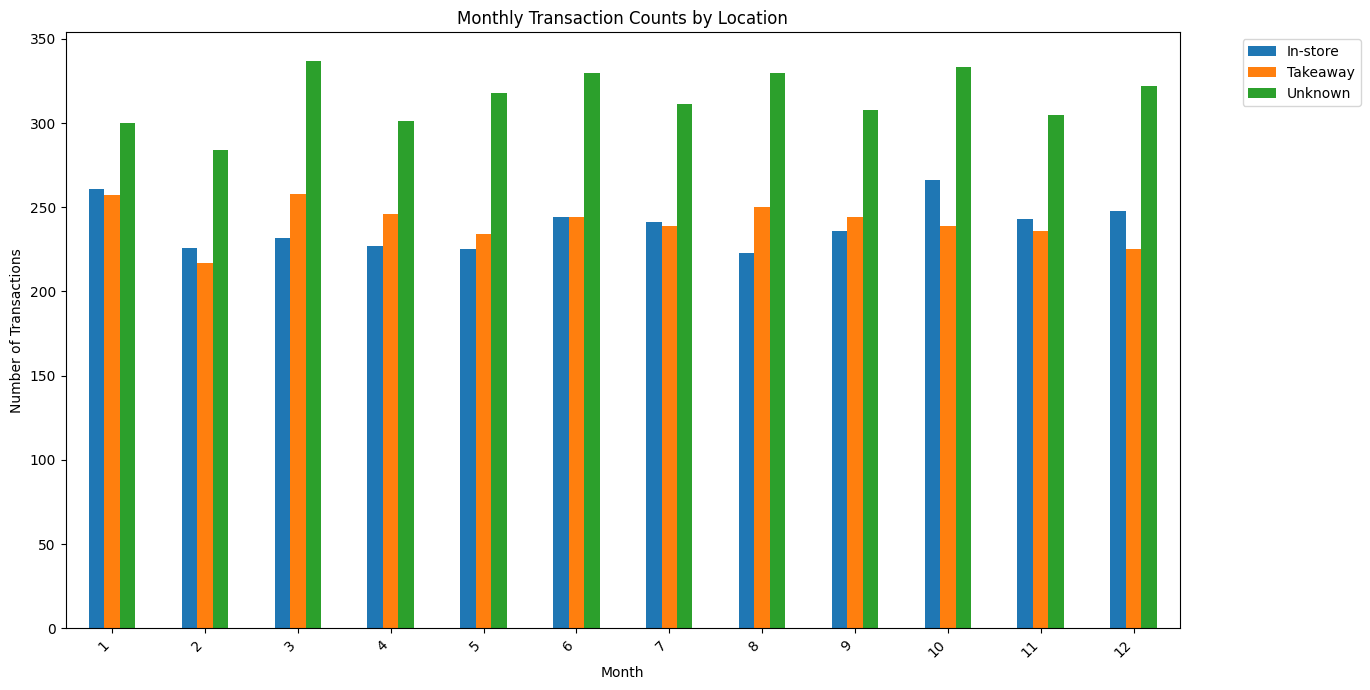

In [278]:
# Ensure 'Month' column exists (created in cell 9299046f) and 'Location' is handled (e.g., fillna)
df_cleaned_location_month = df.copy()
df_cleaned_location_month['Location'] = df_cleaned_location_month['Location'].fillna('Unknown') # Fill NaN for grouping

# Group by Month and Location and count transactions
monthly_location_counts = df_cleaned_location_month.groupby(['Month', 'Location']).size().unstack(fill_value=0)

print("Transaction counts by Month and Location:")
display(monthly_location_counts)

# We can also visualize this trend
ax = monthly_location_counts.plot(kind='bar', stacked=False, figsize=(12, 7)) # Change stacked=True to stacked=False
plt.title('Monthly Transaction Counts by Location')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

In [279]:
# Group by cleaned 'Payment Method' and calculate the sum of 'Total Spent'
payment_method_total_spent = df.groupby('Payment Method')['Total Spent'].sum()

print("Total Spent by Payment Method:")
display(payment_method_total_spent)

Total Spent by Payment Method:


,Total Spent
Payment Method,
Cash,19563.0
Credit Card,19527.5
Digital Wallet,19591.0


/tmp/ipython-input-4291466707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_total_spent.index, y=payment_method_total_spent.values, palette='viridis')


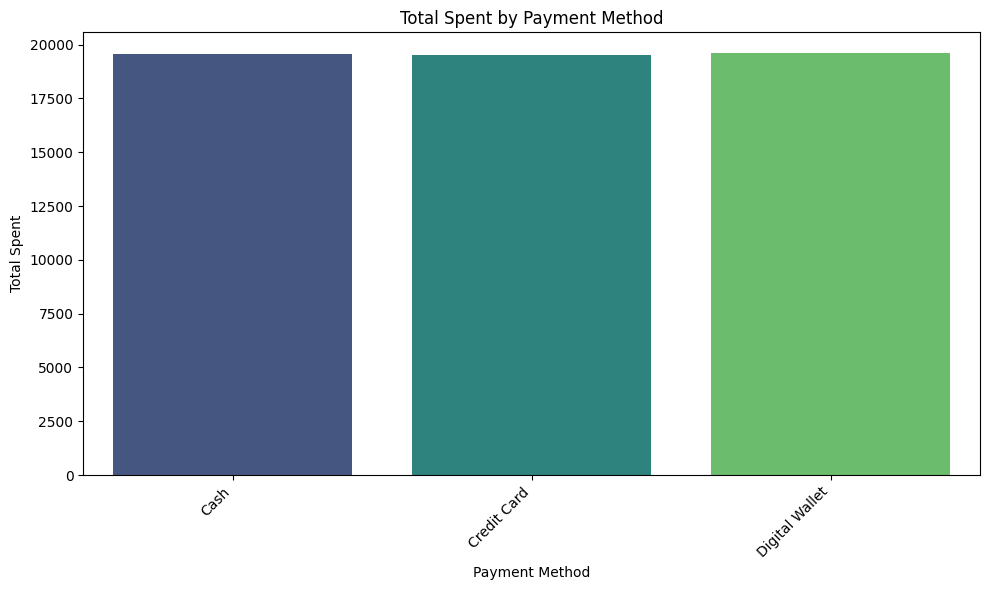

In [280]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_total_spent.index, y=payment_method_total_spent.values, palette='viridis')
plt.title('Total Spent by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [281]:
# Export the DataFrame to a CSV file
df.to_csv('folder_path/cleaned_cafe_sales_data.csv', index=False)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Weekday,Month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday,9
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday,5
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Wednesday,7
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,Thursday,4
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday,6
...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,NaN,2023-08-30,Wednesday,8
9996,TXN_9659401,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-06-02,Friday,6
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02,Thursday,3
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02,Saturday,12
